In [1]:
%load_ext lab_black

In [2]:
from bs4 import BeautifulSoup
import gzip
import json
import re
import datetime
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
pd.set_option("display.max_rows", None)

In [5]:
TIME_STRING = "%Y%m%dT%H%M%SZ"

In [6]:
DIRECTORY = "/home/agude/Projects/blog_projects/zillow_redfin/data/"

In [7]:
def get_date_from_file(file_name: str, time_string: str = TIME_STRING) -> datetime:
    return datetime.datetime.strptime(
        file_name.split("_")[-1].split(".")[0], time_string
    )

# Zillow

In [8]:
def get_zillow_price(file_name: str):

    with gzip.open(file_name) as fp:
        soup = BeautifulSoup(fp, "html.parser")

    item = soup.select_one("script#hdpApolloPreloadedData").text
    api_cache_string = json.loads(item)["apiCache"]
    zillow_data_json = json.loads(api_cache_string)

    for key in zillow_data_json.keys():
        targets = zillow_data_json[key]["property"].get("adTargets")
        if targets is not None:
            price = targets.get("zestimate")
            break

    return price

In [9]:
price_data = {"date": [], "amount": []}

for path in pathlib.Path(DIRECTORY).iterdir():
    if path.is_file() and "zillow_1381" in str(path):
        path_str = str(path)

        price_data["date"].append(get_date_from_file(path_str))
        price_data["amount"].append(get_zillow_price(path_str))

In [10]:
zillow_df = (
    pd.DataFrame.from_dict(price_data).sort_values("date").reset_index(drop=True)
)

zillow_df["amount"] = zillow_df["amount"].astype("float")

zillow_df["website"] = "zillow"

In [11]:
zillow_df.head()

,date,amount,website
0,2022-04-11 01:24:32,1027400.0,zillow
1,2022-04-11 07:03:45,1035800.0,zillow
2,2022-04-12 07:04:05,1035800.0,zillow
3,2022-04-13 07:00:49,1035800.0,zillow
4,2022-04-14 07:02:32,1035800.0,zillow


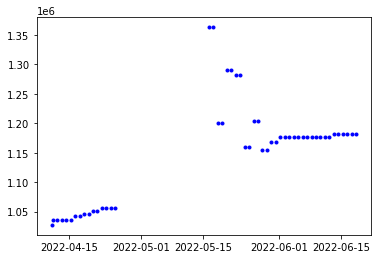

In [12]:
plt.plot(zillow_df["date"], zillow_df["amount"], ".", color="blue")

# Redfin

In [13]:
def get_redfin_price(file_name: str) -> float:

    date = get_date_from_file(file_name)

    with gzip.open(file_name) as fp:
        file_text = str(fp.read())

    return float(file_text.split('predictedValue\\\\":')[1].split("}")[0])

In [14]:
redfin_price_data = {"date": [], "amount": []}

for path in pathlib.Path(DIRECTORY).iterdir():
    if path.is_file() and "redfin_1381" in str(path):
        path_str = str(path)

        redfin_price_data["date"].append(get_date_from_file(path_str))
        redfin_price_data["amount"].append(get_redfin_price(path_str))

In [15]:
redfin_df = (
    pd.DataFrame.from_dict(redfin_price_data).sort_values("date").reset_index(drop=True)
)

redfin_df["amount"] = redfin_df["amount"].astype("float")

redfin_df["website"] = "redfin"

In [16]:
redfin_df

,date,amount,website
0,2022-04-11 01:24:36,1156960.86,redfin
1,2022-04-11 07:03:49,1156960.86,redfin
2,2022-04-12 07:04:09,1156960.86,redfin
3,2022-04-13 07:00:53,1156960.86,redfin
4,2022-04-14 07:02:36,1188334.45,redfin
5,2022-04-15 07:01:36,1188334.45,redfin
6,2022-04-16 07:01:43,1188334.45,redfin
7,2022-04-17 07:00:37,1188334.45,redfin
8,2022-04-18 07:02:41,1188334.45,redfin
9,2022-04-19 07:02:34,1188334.45,redfin


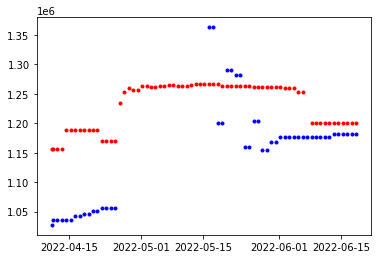

In [17]:
plt.plot(redfin_df["date"], redfin_df["amount"], ".", color="red")
plt.plot(zillow_df["date"], zillow_df["amount"], ".", color="blue")

# realtor.com

In [18]:
def get_realtorcom_price(file_name: str):

    with gzip.open(file_name) as fp:
        soup = BeautifulSoup(fp, "html.parser")

    item = soup.select_one("script#__NEXT_DATA__").text
    api_cache_string = json.loads(item)

    try:
        estimates = api_cache_string["props"]["pageProps"]["initialPropertyDetails"][
            "home"
        ]["estimates"]["current_values"][0]

    except KeyError:
        return None

    high, mid, low, source, date, source = (
        estimates["estimate_high"],
        estimates["estimate"],
        estimates["estimate_low"],
        estimates["estimate_low"],
        estimates["date"],
        estimates["source"]["type"],
    )

    return high, mid, low, source, date, source

In [19]:
realtorcom_price_data = {
    "date": [],
    "prediction_date": [],
    "amount": [],
    "amount_high": [],
    "amount_low": [],
    "source": [],
}

for path in pathlib.Path(DIRECTORY).iterdir():
    if path.is_file() and "realtorcom_1381" in str(path):
        path_str = str(path)

        try:
            high, mid, low, source, date, source = get_realtorcom_price(path_str)

        except TypeError:  # Returned none
            continue

        model_date = datetime.datetime.strptime(date, "%Y-%m-%d")
        read_date = get_date_from_file(path_str)

        realtorcom_price_data["date"].append(read_date)
        realtorcom_price_data["prediction_date"].append(model_date)
        realtorcom_price_data["amount"].append(mid)
        realtorcom_price_data["amount_high"].append(high)
        realtorcom_price_data["amount_low"].append(low)
        realtorcom_price_data["source"].append(source)

In [20]:
realtor_df = (pd.DataFrame.from_dict(realtorcom_price_data)).drop_duplicates()

start_date = datetime.date(2022, 4, 22)
end_date = datetime.date(2022, 5, 27)

dates = []
for n in range(int((end_date - start_date).days)):
    n_date = start_date + datetime.timedelta(n)
    dates.append([n_date, n_date, None, None, None, None])

append_df = pd.DataFrame(
    columns=realtor_df.columns,
    data=dates,
)

realtor_df = pd.concat([realtor_df, append_df])

# Cast Columns as nullable int
cast_cols = ["amount", "amount_high", "amount_low"]
realtor_df[cast_cols] = realtor_df[cast_cols].astype("float")

date_cols = ["date", "prediction_date"]
realtor_df[date_cols] = realtor_df[date_cols].astype("datetime64[ns]")

realtor_df["error_low"] = realtor_df["amount"] - realtor_df["amount_low"]
realtor_df["error_high"] = realtor_df["amount_high"] - realtor_df["amount"]


realtor_df = realtor_df.sort_values("date").reset_index(drop=True)

realtor_df["website"] = "realtor.com"

In [21]:
realtor_df.head()

,date,prediction_date,amount,amount_high,amount_low,source,error_low,error_high,website
0,2022-04-11 01:24:40,2022-03-31,1104300.0,1268500.0,940200.0,corelogic,164100.0,164200.0,realtor.com
1,2022-04-11 07:03:53,2022-03-31,1104300.0,1268500.0,940200.0,corelogic,164100.0,164200.0,realtor.com
2,2022-04-12 07:04:14,2022-03-31,1104300.0,1268500.0,940200.0,corelogic,164100.0,164200.0,realtor.com
3,2022-04-13 07:00:57,2022-03-31,1104300.0,1268500.0,940200.0,corelogic,164100.0,164200.0,realtor.com
4,2022-04-14 07:02:41,2022-03-31,1104300.0,1268500.0,940200.0,corelogic,164100.0,164200.0,realtor.com


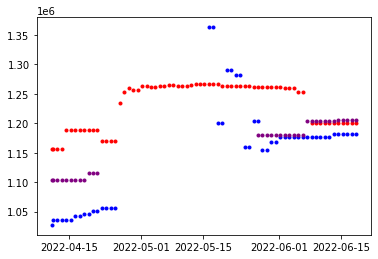

In [22]:
plt.plot(redfin_df["date"], redfin_df["amount"], ".", color="red")
plt.plot(zillow_df["date"], zillow_df["amount"], ".", color="blue")
plt.plot(realtor_df["date"], realtor_df["amount"], ".", color="purple")

# Combine

In [23]:
combined_df = pd.concat(
    [
        realtor_df,
        redfin_df,
        zillow_df,
    ]
)

In [24]:
combined_df.to_json("./home_price_estimate_20220701.json", orient="table")